# Making a CMD for your Star Cluster

This notebook introduces a few commands that you'll need to make the Color Magnitude Diagram for your star cluster. You can also use the cells below to write code for your unit project.

## .loc[ ] indexing

In [1]:
import pandas as pd

In [2]:
# Here we create a sample dataframe
sample_df = pd.DataFrame({"column 1": [20,50,15,50,65,50,10], "column 2": [0,1,1,1,0,0,1]})
sample_df

,column 1,column 2
0,20,0
1,50,1
2,15,1
3,50,1
4,65,0
5,50,0
6,10,1


In [3]:
df = pd.read_csv("oh_table.csv")

In [4]:
df.head(10)

,row_id,tgas_source_id,name,ra,dec,parallax,distance,G,J,rave_obs_id,rv,erv,group_id,group_size
0,659,49809491645958528,TYC 1253-388-1,59.457281,18.562195,7.7395,129.949,11.160,9.984,NaN,NaN,NaN,0,151
1,1559,66939848447027584,TYC 1804-1924-1,57.070387,25.214932,7.6087,132.557,9.066,8.137,20120109_0346p23_140,2.95,1.6,0,151
2,1904,50905051903831680,HIP 18091,58.003444,19.596690,6.7611,148.752,10.265,9.267,NaN,NaN,NaN,0,151
3,1929,51452746133437696,HIP 18544,59.507154,20.676596,7.6989,131.839,9.249,8.436,NaN,NaN,NaN,0,151
4,1944,51619115986889472,TYC 1261-1630-1,58.370320,20.907178,7.4847,134.194,11.553,10.096,NaN,NaN,NaN,0,151
5,1947,51674916201705344,TYC 1261-1415-1,58.883173,21.079283,8.1792,122.925,10.843,9.624,NaN,NaN,NaN,0,151
6,1948,51694741770737152,TYC 1261-24-1,59.590162,21.257481,7.2723,138.427,11.180,9.938,NaN,NaN,NaN,0,151
7,1952,51742467447748224,HIP 18266,58.616054,21.389549,7.4388,135.054,10.713,9.601,NaN,NaN,NaN,0,151
8,1953,51861420861864448,HIP 19367,62.230862,20.385791,7.9813,126.397,9.232,8.378,NaN,NaN,NaN,0,151
9,2049,53783848223326976,HIP 18955,60.934125,22.944098,7.2344,139.501,9.491,8.519,NaN,NaN,NaN,0,151


You can use the .loc index method to select all the items in one column which have a particular value in the second column. For example, we may want to select all items from column 1 that have a value of 0 in column 2.

Follow along with the live coding activity to see how this works.

In [5]:
# This code selects all values from column 1 where the value on that same row in column 2 is equal to 0
zeros = sample_df["column 1"].loc[sample_df["column 2"] == 0]
zeros

0    20
4    65
5    50
Name: column 1, dtype: int64

In [6]:
twentydf = sample_df.loc[sample_df["column 1"] < 30]
twentydf

,column 1,column 2
0,20,0
2,15,1
6,10,1


Now you try! Select all the values from column 1 where the value on that same row in column 2 is equal to 1.

In [7]:
ones = sample_df["column 1"].loc[sample_df["column 2"] == 1]
ones

1    50
2    15
3    50
6    10
Name: column 1, dtype: int64

Now select all the values from column 2 where the value on that same row in column 1 is equal to 50.

In [8]:
fifty = sample_df["column 2"].loc[sample_df["column 1"] == 50]
fifty

1    1
3    1
5    0
Name: column 2, dtype: int64

Create a new sample dataframe that includes all rows where the value in column 2 is 0

In [9]:
newdf = sample_df.loc[sample_df["column 2"] == 0]
newdf

,column 1,column 2
0,20,0
4,65,0
5,50,0


#### Note: You can store these selected values in a variable, just like you've done with entire columns!

## Finding absolute magnitude

You will need to convert "G" to absolute magnitude for your CMD.

Look in the dataset for distance. Using G and distance, you can calculate absolute magnitude using the following equation:

absolute magnitude = G - 5 * log(distance) + 5

In [10]:
# You will need to import numpy
import numpy as np

In [11]:
# You can use this function in your code to find the log of distance
df["am"] = df["G"] - 5 * np.log10(df["distance"]) + 5
# np.log10()
df.head()

,row_id,tgas_source_id,name,ra,dec,parallax,distance,G,J,rave_obs_id,rv,erv,group_id,group_size,am
0,659,49809491645958528,TYC 1253-388-1,59.457281,18.562195,7.7395,129.949,11.160,9.984,NaN,NaN,NaN,0,151,5.591135
1,1559,66939848447027584,TYC 1804-1924-1,57.070387,25.214932,7.6087,132.557,9.066,8.137,20120109_0346p23_140,2.95,1.6,0,151,3.453987
2,1904,50905051903831680,HIP 18091,58.003444,19.596690,6.7611,148.752,10.265,9.267,NaN,NaN,NaN,0,151,4.402686
3,1929,51452746133437696,HIP 18544,59.507154,20.676596,7.6989,131.839,9.249,8.436,NaN,NaN,NaN,0,151,3.648780
4,1944,51619115986889472,TYC 1261-1630-1,58.370320,20.907178,7.4847,134.194,11.553,10.096,NaN,NaN,NaN,0,151,5.914335


### Your first task is to create a Color Magnitude Diagram for your star cluster
You can use as many of the cells below as you need. You can add new cells with the "+" button.

In [12]:
groupdf = df.loc[df["group_id"] == 8]
groupdf

,row_id,tgas_source_id,name,ra,dec,parallax,distance,G,J,rave_obs_id,rv,erv,group_id,group_size,am
744,3545,5996829257910614400,TYC 7855-650-1,241.064657,-40.844761,6.9262,145.249,7.583,7.407,NaN,NaN,NaN,8,47,1.772434
745,3911,5997820948678954752,TYC 7851-1-1,241.437412,-39.101934,7.2351,138.809,10.119,8.910,NaN,NaN,NaN,8,47,4.406912
746,4904,5989177825205202176,TYC 7848-1659-1,234.679345,-44.196620,7.8577,128.569,10.131,8.805,NaN,NaN,NaN,8,47,4.585319
747,5021,5989693599238982528,HIP 77432,237.103140,-42.618184,7.8655,127.971,8.814,8.112,NaN,NaN,NaN,8,47,3.278442
748,5508,5993268145899442816,HIP 79400,243.069674,-42.375176,7.9631,126.612,8.137,7.581,NaN,NaN,NaN,8,47,2.624626
749,5533,6211094559143445888,HIP 74865,229.483693,-30.478291,7.6902,130.561,8.777,8.064,NaN,NaN,NaN,8,47,3.197933
750,5829,5995989471537933184,HIP 78133,239.311119,-41.505797,7.8919,127.217,10.126,9.031,NaN,NaN,NaN,8,47,4.603274
751,5923,5996941820406360576,HIP 78853,241.442734,-39.843440,6.8330,150.904,7.946,NaN,NaN,NaN,NaN,8,47,2.052496
752,5935,5997064931348921728,TYC 7851-1636-1,241.638306,-39.259610,7.2731,138.848,7.881,7.662,NaN,NaN,NaN,8,47,2.168302
753,5937,5997089773439760256,TYC 7851-95-1,241.657119,-39.145242,7.3559,136.644,8.892,8.194,NaN,NaN,NaN,8,47,3.214047


In [13]:
import matplotlib.pyplot as plt
import matplotlib.colors as mpl # We'll use the matplotlib.colors library to color our data points
%matplotlib inline

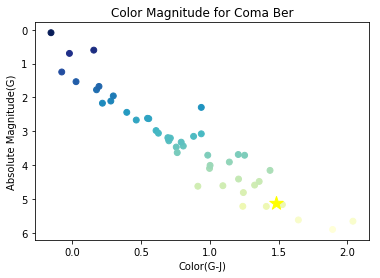

In [44]:
cm = plt.cm.get_cmap("YlGnBu_r")
plt.scatter(groupdf["G"] - groupdf["J"], groupdf["am"], c =groupdf["am"],cmap = cm, s = 35)
plt.scatter(5.12 - 3.64, 5.12, marker = "*", s = 200, color = "yellow")
plt.gca().invert_yaxis()
plt.title("Color Magnitude for Coma Ber")
plt.xlabel("Color(G-J)")
plt.ylabel("Absolute Magnitude(G)")
plt.show()

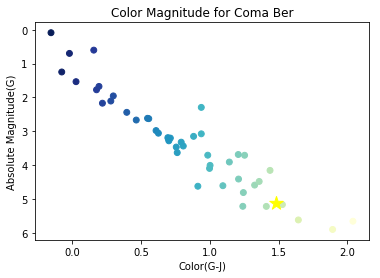

In [45]:
cm = plt.cm.get_cmap("YlGnBu_r")
plt.scatter(groupdf["G"] - groupdf["J"], groupdf["am"], c =groupdf["G"] - groupdf["J"],cmap = cm, s = 35)
plt.scatter(5.12 - 3.64, 5.12, marker = "*", s = 200, color = "yellow")
plt.gca().invert_yaxis()
plt.title("Color Magnitude for Coma Ber")
plt.xlabel("Color(G-J)")
plt.ylabel("Absolute Magnitude(G)")
plt.show()

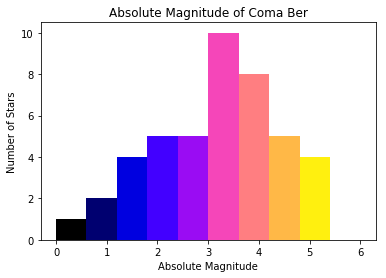

In [33]:
#cm = plt.cm.get_cmap("gnuplot2")
#plt.hist(star["abmag"], 10, (0, 6), cmap = cm)
plt.title("Absolute Magnitude of Coma Ber")
plt.xlabel("Absolute Magnitude")
plt.ylabel("Number of Stars")
#plt.show()
cm = plt.cm.get_cmap('gnuplot2')
# Plot histogram.
n, bins, patches = plt.hist(groupdf["am"], 10, (0,6))
bin_centers = 0.5 * (bins[:-1] + bins[1:])
# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
plt.savefig("Absolute_Magnitude_of_Coma_Ber")
plt.show()

### Coding Challenge 1: Add the sun to your color magnitude diagram

### Coding Challenge 2: Add a colormap to your diagram

### Coding Challenge 3: Create histograms for the absolute magnitude and color of your star cluster

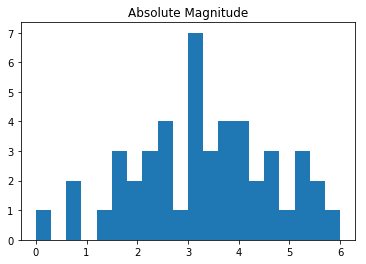

In [15]:
plt.hist(groupdf["am"], 20, (0, 6))
plt.title("Absolute Magnitude")
plt.show()